In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan=pd.read_csv("C:\\Users\\Lenovo PC\\Desktop\\python\\dataset\\loan_pred.csv")

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.shape

(614, 13)

In [6]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#loan amount has some missing values(614-592=22),LOAN AMOUNT TERM =14 MISSING VALUES
#credit history=50 MISSING VALUES
#ABOVE 84% HAS CREDIT HISTORY 1,OTHERWISE 0

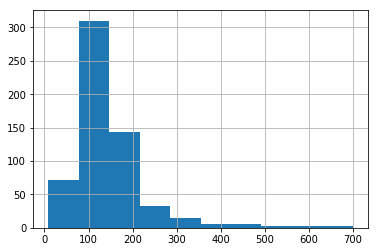

In [7]:
loan['LoanAmount'].hist() #loan amount is not normally distributed

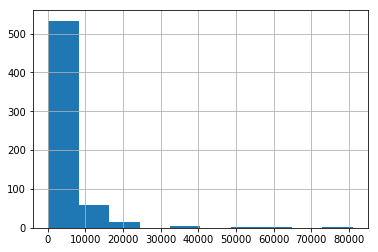

In [8]:
loan['ApplicantIncome'].hist() #not normalised

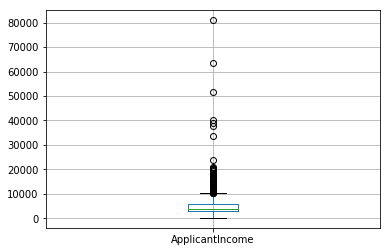

In [9]:
loan.boxplot(column='ApplicantIncome') #this boxplot in pandas#,max range of the income=10000,min=0,points=outliers,median=3000,maximum=80,000,betn 10,000 and 20,000,points are more

In [ ]:
#this confirms the presence of many outliers,this can be attributed to the income disparity  in the society

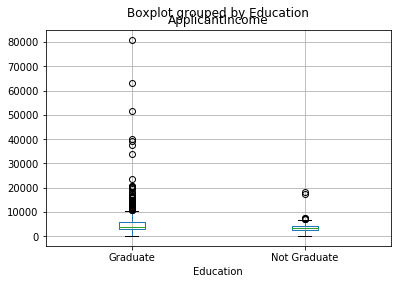

In [10]:
loan.boxplot(column='ApplicantIncome',by='Education')

In [ ]:
#there are a higher no. of graduate with high income

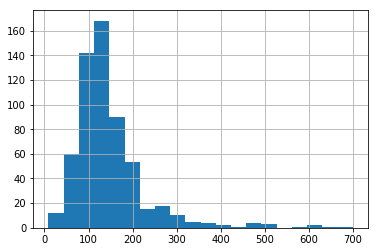

In [12]:
loan['LoanAmount'].hist(bins=20) #design divide into more parts

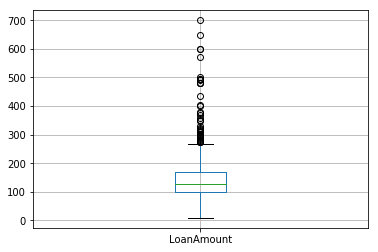

In [13]:
loan.boxplot(column='LoanAmount') #max=700

In [14]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

In [18]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
loan['Gender'].fillna(method="ffill",inplace=True) #incase of string value

In [20]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
loan['Self_Employed'].fillna('No',inplace=True)

In [23]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
loan['Credit_History'].fillna(1,inplace=True)

In [28]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True) #count from 0th position

In [30]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

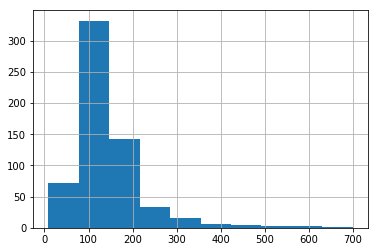

In [31]:
loan['LoanAmount'].hist()

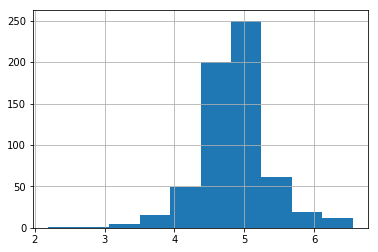

In [33]:
#log transformation=to make the value small_to make loan amount normalised
loan['LoanAmount_log']=np.log(loan['LoanAmount'])
loan['LoanAmount_log'].hist()

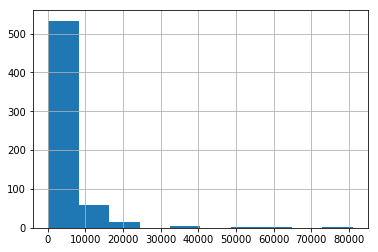

In [34]:
loan['ApplicantIncome'].hist()

LOG TRANSFORMATION FOR APPLICANT INCOME

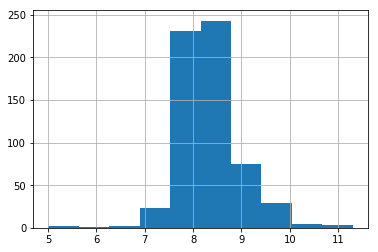

In [35]:
loan['App_in_log']=np.log(loan['ApplicantIncome'])
loan['App_in_log'].hist()

In [36]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
App_in_log           float64
dtype: object